In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.dropna(inplace=True)


In [8]:
# if the target value is missing, then drop it, if independent variable is missing then use mean median etc.

In [9]:
# first we will fix price, it is listed as object:
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [10]:
#fix the price column
df['Price']=df['Price'].map(lambda x: 0 if x=='0' else float(x[1:]))

In [11]:
df['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [12]:
#fix the reviews column
df['Reviews'].value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

In [13]:
df['Reviews']=df['Reviews'].astype('int32')

In [14]:
#fix content_rating
df['Content_Rating'].value_counts()

Everyone           7414
Teen               1084
Mature_17+          461
Everyone_10+        397
Adults_only_18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [15]:
#fix installs
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [16]:
# we have to remove comma,+ sign and convert it into integer
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [17]:
df['Installs']=df['Installs'].map(clean_installs)

In [18]:
#fix size
df['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [19]:
def clean_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in size:
        x=size[:1]
        x=float(x)
        return x
    else:
        return None

In [20]:
df['Size']=df['Size'].map(clean_size)

In [21]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [22]:
df['Size'].fillna(df['Size'].median(),inplace=True)

In [23]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,14000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [25]:
len(df[df['Reviews'] > df['Installs']])

7

In [26]:
df[df['Reviews'] > df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [27]:
df=df[df['Reviews'] <= df['Installs']]

In [28]:
df.shape

(9353, 13)

In [29]:
# any app which is listed free and has price zero
df[(df['Price'] > 0) & (df['Type']=='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver


therefore no app

# Univariate Analysis

In [30]:
df['Price'].describe().round(0)

count    9353.0
mean        1.0
std        16.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max       400.0
Name: Price, dtype: float64

IQR =Q3-Q1=0
UB=0,LB=0
Therefore any non zero value will be an outlier

<AxesSubplot:xlabel='Price'>

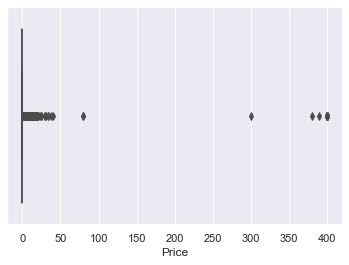

In [31]:
sns.boxplot(data=df,x='Price')

In [32]:
df['Reviews'].describe().round(0)

count        9353.0
mean       514761.0
std       3146169.0
min             1.0
25%           187.0
50%          5967.0
75%         81747.0
max      78158306.0
Name: Reviews, dtype: float64

<AxesSubplot:xlabel='Reviews'>

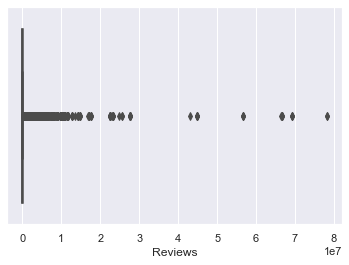

In [33]:
sns.boxplot(data=df,x='Reviews')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

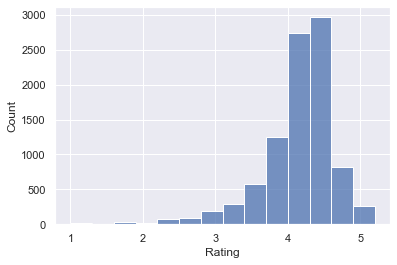

In [34]:
sns.histplot(data=df,x='Rating',binwidth=.3)

# Treatment of Outliers

<AxesSubplot:xlabel='Price'>

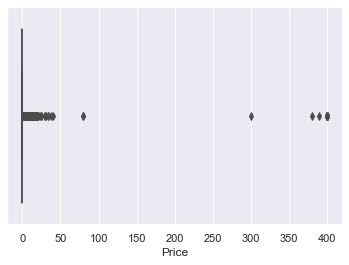

In [35]:
sns.boxplot(data=df,x='Price')

In [36]:
df['Price'] < 200

0        True
1        True
2        True
3        True
4        True
         ... 
10834    True
10836    True
10837    True
10839    True
10840    True
Name: Price, Length: 9353, dtype: bool

In [37]:
df=df[df['Price'] < 200]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14000.0,1000,Free,0.0,Mature_17+,Books_&_Reference,"January 19, 2015",Varies with device,Varies with device


In [38]:
df['Reviews'].describe().round(0)

count        9338.0
mean       515586.0
std       3148627.0
min             1.0
25%           188.0
50%          6009.0
75%         82471.0
max      78158306.0
Name: Reviews, dtype: float64

<AxesSubplot:xlabel='Reviews'>

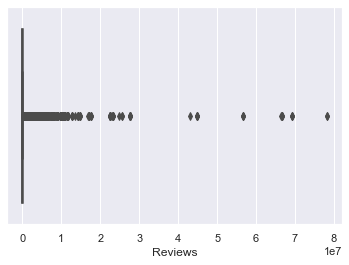

In [39]:
sns.boxplot(data=df,x='Reviews')

In [40]:
#dropping apps which have reviews more than 2 million.
df=df[df['Reviews'] < 2000000]

In [41]:
df.shape

(8885, 13)

In [42]:
df['Installs'].describe().round(2)

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [43]:
df['Installs'].quantile([.1,.2,.60,.99])

0.10         1000.0
0.20        10000.0
0.60      1000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [44]:
#observations:
    #10% have 1000 installs or lower 

In [45]:
#only 1% of apps have more than 100 Million installs: these are not representavtive of the general apps in the appstore

In [46]:
df=df[df['Installs'] < 1000000000]

In [47]:
df.shape

(8879, 13)

# BIVARIATE ANALYSIS

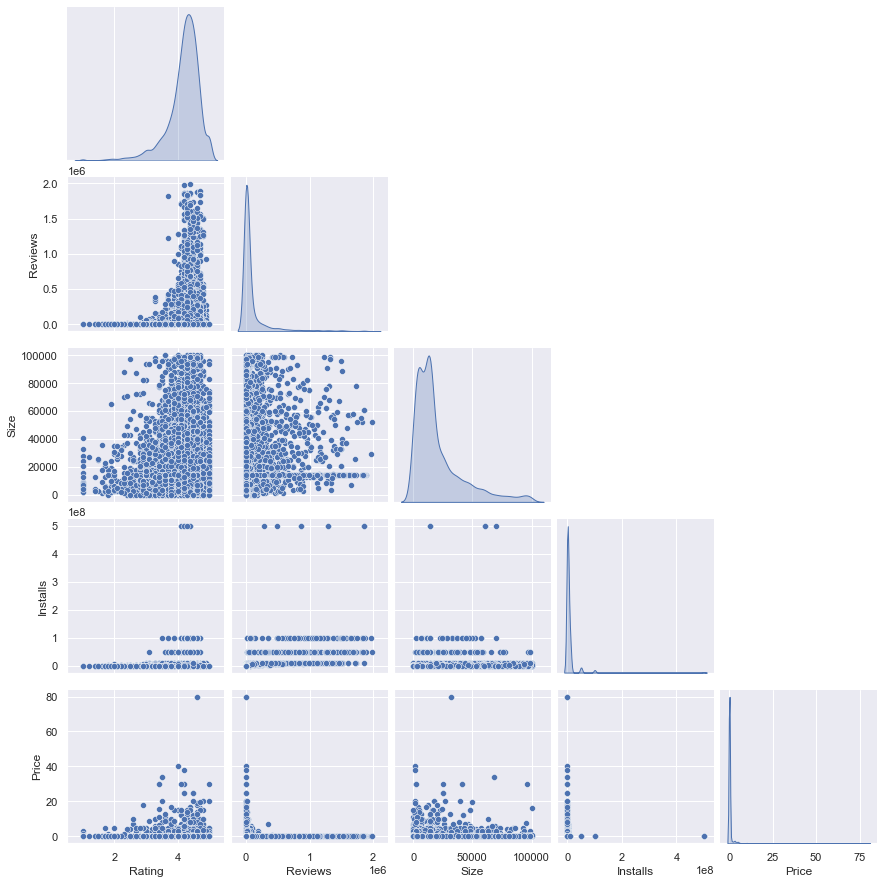

In [48]:
sns.pairplot(data=df,corner='True',diag_kind='kde')

In [49]:
#There should be no correlation between independent variables.

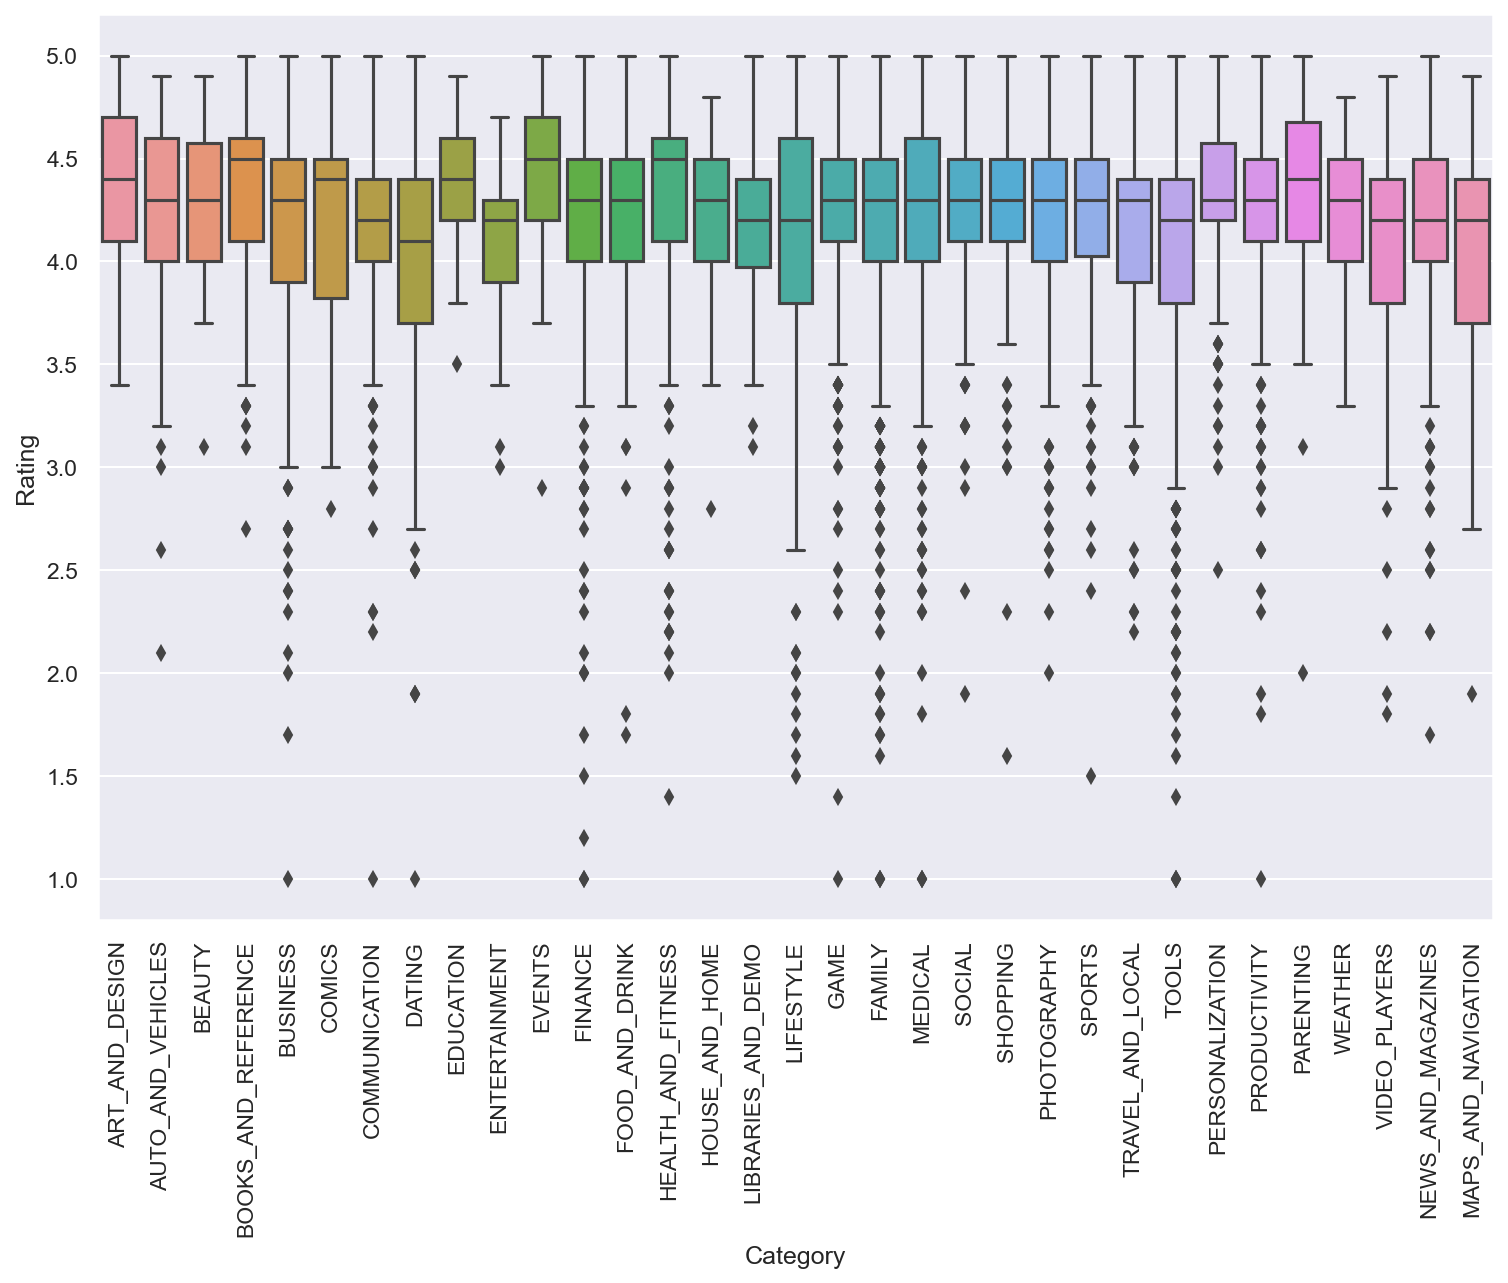

In [50]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(data=df,x='Category',y='Rating')
plt.xticks(rotation=90);

# DATA TRANSFORMATION

<AxesSubplot:xlabel='Installs'>

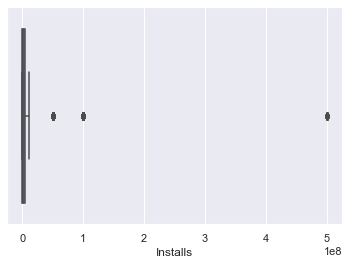

In [51]:
sns.boxplot(data=df,x='Installs')

In [52]:
# we will do log transformation to the installs column as the number is millions.
df1=df.copy()

In [53]:
df1['Installs']=df1['Installs'].apply(np.log1p)
df1['Reviews']=df1['Reviews'].apply(np.log1p)

<AxesSubplot:xlabel='Installs'>

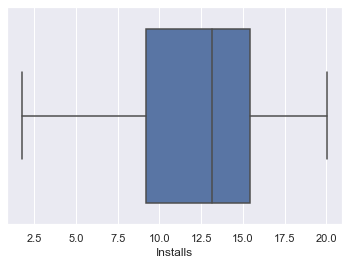

In [54]:
sns.boxplot(data=df1,x='Installs')

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

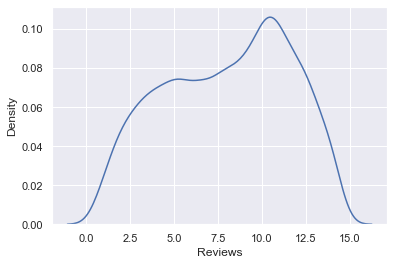

In [55]:
sns.kdeplot(data=df1,x='Reviews')

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

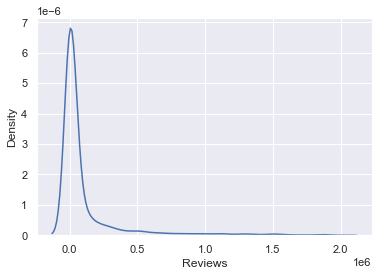

In [56]:
sns.kdeplot(data=df,x='Reviews')

if we compare the above graphs, we find skewness without log transformation

In [57]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [59]:
#Dropping the columns which are not useful for predictions
df1.drop(['App','Last Updated', 'Current Ver',
       'Android Ver'],axis=1,inplace=True)

In [60]:
df1.shape

(8879, 9)

# Categorical Encoding

In [61]:
df2=pd.get_dummies(df1,drop_first=True)

In [62]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [63]:
#from  sklearn.preprocessing import LabelEncoder
#le=labelencoder()
#df1['category']=le.fit_transform(df1['category'])

In [64]:
X=df2.drop('Rating',axis=1)
y=df2['Rating']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [66]:
from statsmodels.api import OLS

In [67]:
model=OLS(y_train,X_train).fit()

In [68]:
#what is the purpose of training:to find the Beta coefficients

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):                        0.00
Time:                        18:22:38   Log-Likelihood:                         -4281.6
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.058      0.000       0.163       0.187
Size                                         -3.201e-07   3.59e-07     -0.892      0.372   -1.02e-06    3.83e-07
Installs                                        -0.1499      0.006    -24.185      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.180      0.857      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6384      0.125     13.138      0.000       1.394       1.883
Category_BEAUTY                                  1.7217      0.128     13.464      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6847      0.122     13.829      0.000       1.446       1.923
Category_BUSINESS                                1.6048      0.121     13.274      0.000       1.368       1.842
Category_COMICS                                  2.3788      0.226     10.518      0.000       1.935       2.822
Category_COMMUNICATION                           1.5481      0.121     12.767      0.000       1.310       1.786
Category_DATING                                  1.5017      0.122     12.265      0.000       1.262       1.742
Category_EDUCATION                               2.8672      0.251     11.427      0.000       2.375       3.359
Category_ENTERTAINMENT                           2.7776      0.251     11.070      0.000       2.286       3.269
Category_EVENTS                                  1.7449      0.126     13.794      0.000       1.497       1.993
Category_FAMILY                                  2.9012      0.243     11.926      0.000       2.424       3.378
Category_FINANCE                                 1.5686      0.121     12.977      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5996      0.123     13.008      0.000       1.358       1.841
Category_GAME                                    3.1400      0.241     13.049      0.000       2.668       3.612
Category_HEALTH_AND_FITNESS                      1.6294      0.121     13.463      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6153      0.124     13.004      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6543      0.125     13.249      0.000       1.410       1.899
Category_LIFESTYLE                               1.5915      0.121     13.157      0.000       1.354       1.829
Category_MAPS_AND_NAVIGATION                     1.5214      0.123     12.401      0.000       1.281       1.762
Category_MEDICAL                              

In [70]:
#Prob(F-stastics):<=.5;therefore reject null hypothesis: 

In [71]:
#null  and alternate hypothesis mutually exlusively

In [72]:
#hO=null hypothesis ie all the coefficients are zero
#h1= atleast one coefficient is  non zero

In [73]:
#here size has p value > .05; therefore it is stastically not different from .zero

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [75]:
y_pred=model.predict(X_test)

In [76]:
y_pred[:10]

1161     4.079198
4125     3.932610
3499     4.330407
6232     4.596357
4239     4.123923
1002     4.163840
10269    4.118338
9862     4.293908
9922     3.903549
2302     4.032888
dtype: float64

In [77]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.4920539651726564


In [78]:
#RMSE ;eg;ratings of an app vary btwn 1-5,normaly 4-5;avg 4.25, rmse=0.49;

 #therefore in order to evaluate the performance of the model,check RMSE/MEAN Y_TEST

In [80]:
0.4920539651726564/y_test.mean()

0.11820476696153606

In [81]:
#11.8% is the avrg margin of error.

In [82]:
from sklearn.linear_model import Ridge

In [84]:
ridge_model=Ridge(alpha=.001,normalize=True)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001, normalize=True)

In [85]:
pred=ridge_model.predict(X_test)

In [87]:
print(np.sqrt(mean_squared_error(y_test,pred)))

0.4879987555165292


In [88]:
0.4879987555165292

0.4786676907431027


In [89]:
0.4879987555165292/y_test.mean()

0.117230595130171

In [90]:
from sklearn.linear_model import ElasticNet

In [91]:
net=ElasticNet(alpha=.001,normalize=True)

In [92]:
net.fit(X_train,y_train)

ElasticNet(alpha=0.001, normalize=True)

In [93]:
print(np.sqrt(mean_squared_error(y_test,net.predict(X_test))))

0.5220643755303499


In [96]:
print(np.sqrt(mean_squared_error(y_train,net.predict(X_train))))

0.5214331925073523
